In [1]:
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn           import metrics
from sklearn.metrics   import accuracy_score, confusion_matrix, classification_report
from matplotlib.ticker import NullFormatter
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline


In [2]:
with open('credit.pkl', 'rb') as f:
    X_cred_train, y_cred_train, X_cred_test, y_cred_teste = pickle.load(f)

Minimum error:- 0.1036653091447612 at K = 10


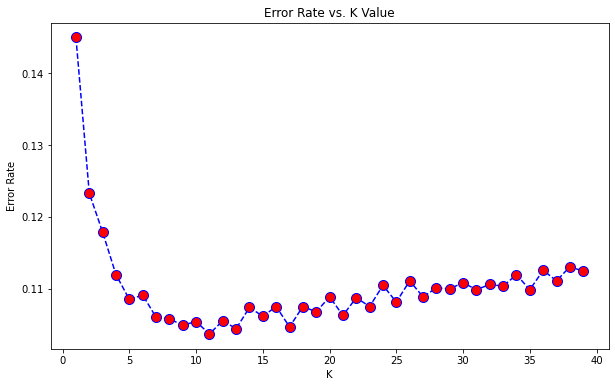

In [3]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_cred_train,y_cred_train)
    pred_i = knn.predict(X_cred_test)
    error_rate.append(np.mean(pred_i != y_cred_teste))

plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8963346908552388 at K = 10


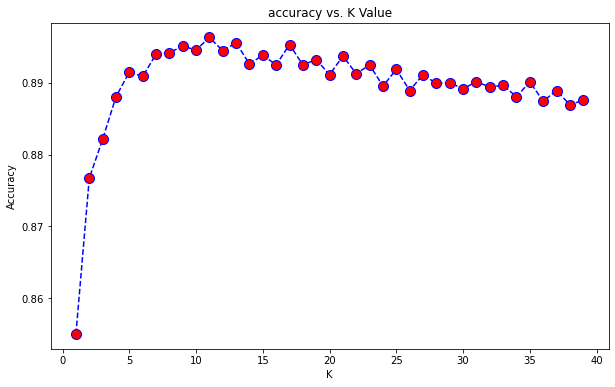

In [4]:
acc = []

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_cred_train,y_cred_train)
    yhat = neigh.predict(X_cred_test)
    acc.append(metrics.accuracy_score(y_cred_teste, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum recall:- 0.6461625282167043 at K = 0


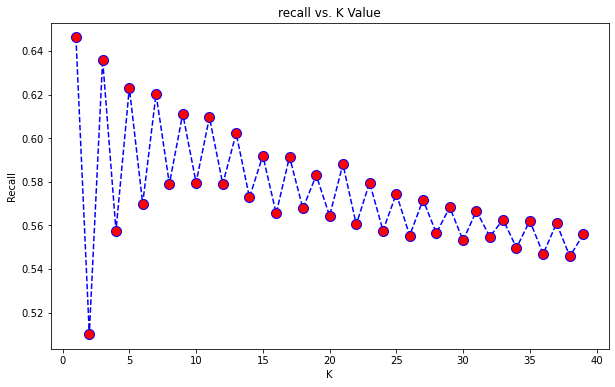

In [5]:
rec = []

for i in range(1,40):
    
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_cred_train,y_cred_train)
    yhat = neigh.predict(X_cred_test)
    rec.append(metrics.recall_score(y_cred_teste, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),rec,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('recall vs. K Value')
plt.xlabel('K')
plt.ylabel('Recall')
print("Maximum recall:-",max(rec),"at K =",rec.index(max(rec)))

In [6]:
knn_credit = KNeighborsClassifier(n_neighbors= 10, metric = "minkowski", p = 2)
knn_credit.fit(X_cred_train,y_cred_train)

KNeighborsClassifier(n_neighbors=10)

In [7]:
prev = knn_credit.predict(X_cred_test)

In [8]:
accuracy_score(y_cred_teste, prev)

0.8946069357028261

In [9]:
confusion_matrix(y_cred_teste, prev)

array([[6222,  109],
       [ 745, 1027]], dtype=int64)

In [10]:
print(classification_report(y_cred_teste, prev))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      6331
           1       0.90      0.58      0.71      1772

    accuracy                           0.89      8103
   macro avg       0.90      0.78      0.82      8103
weighted avg       0.90      0.89      0.89      8103

